In [1]:
import pandas as pd
import numpy as np
import anndata as ad

In [2]:
adata = ad.read_h5ad('./adata.h5ad')

In [3]:
import scanpy as sc
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=5000)
adata = adata[:, adata.var['highly_variable']]

In [4]:
adata

View of AnnData object with n_obs × n_vars = 2309 × 5000
    obs: 'cell_types', 'week', 'Gene_num', 'Pre_Map_Reads', 'Aligned_Reads', 'MappingRate', 'pfc'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [5]:
adata1 = adata.copy()

### PCA

In [6]:
sc.tl.pca(adata1, svd_solver="arpack")

/home/huangxr/anaconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


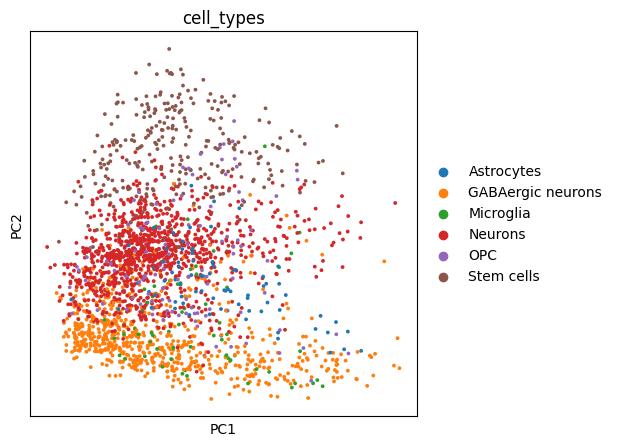

/home/huangxr/anaconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


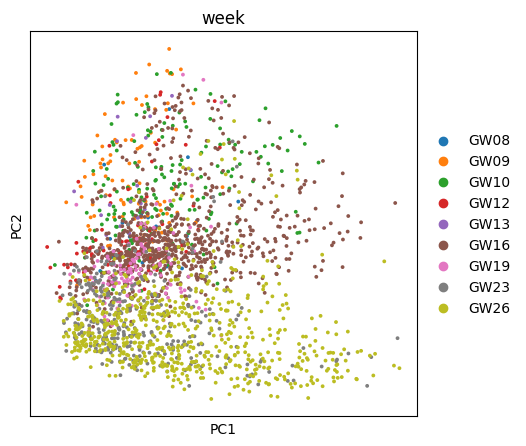

In [10]:
from matplotlib import rcParams

FIGSIZE = (5, 5)
rcParams["figure.figsize"] = FIGSIZE

sc.pl.pca(adata1,color=['cell_types'], size = 30, save="_cell_types")
sc.pl.pca(adata1,color=['week'], size = 30, save="_week")

### umap

In [13]:
sc.pp.neighbors(adata1, n_neighbors=10)

/home/huangxr/anaconda3/envs/st/lib/python3.8/site-packages/umap/distances.py:1053: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/huangxr/anaconda3/envs/st/lib/python3.8/site-packages/umap/distances.py:1061: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/huangxr/anaconda3/envs/st/lib/python3.8/site-packages/umap/distances.py:

/home/huangxr/anaconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


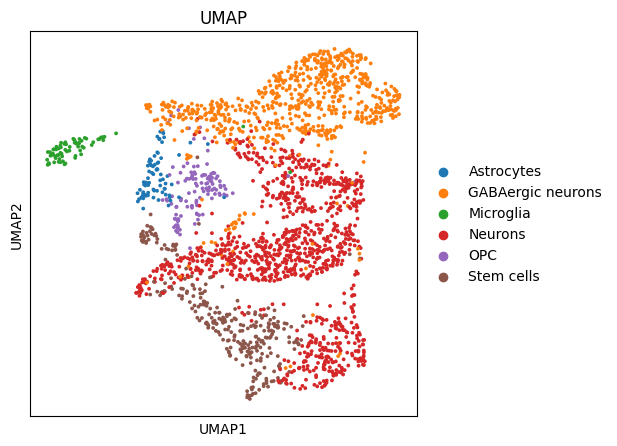

/home/huangxr/anaconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


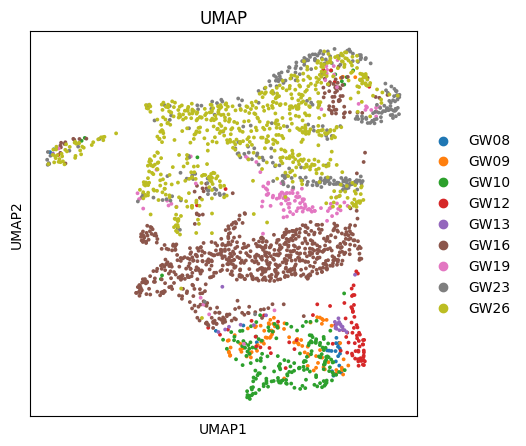

In [31]:
sc.pp.neighbors(adata1, n_neighbors=10, n_pcs=20)
sc.tl.umap(adata1)
sc.pl.umap(adata1, color=['cell_types'], size = 30, title = 'UMAP', save = '_celltype')
sc.pl.umap(adata1, color=['week'], size = 30, title = 'UMAP', save = '_week')

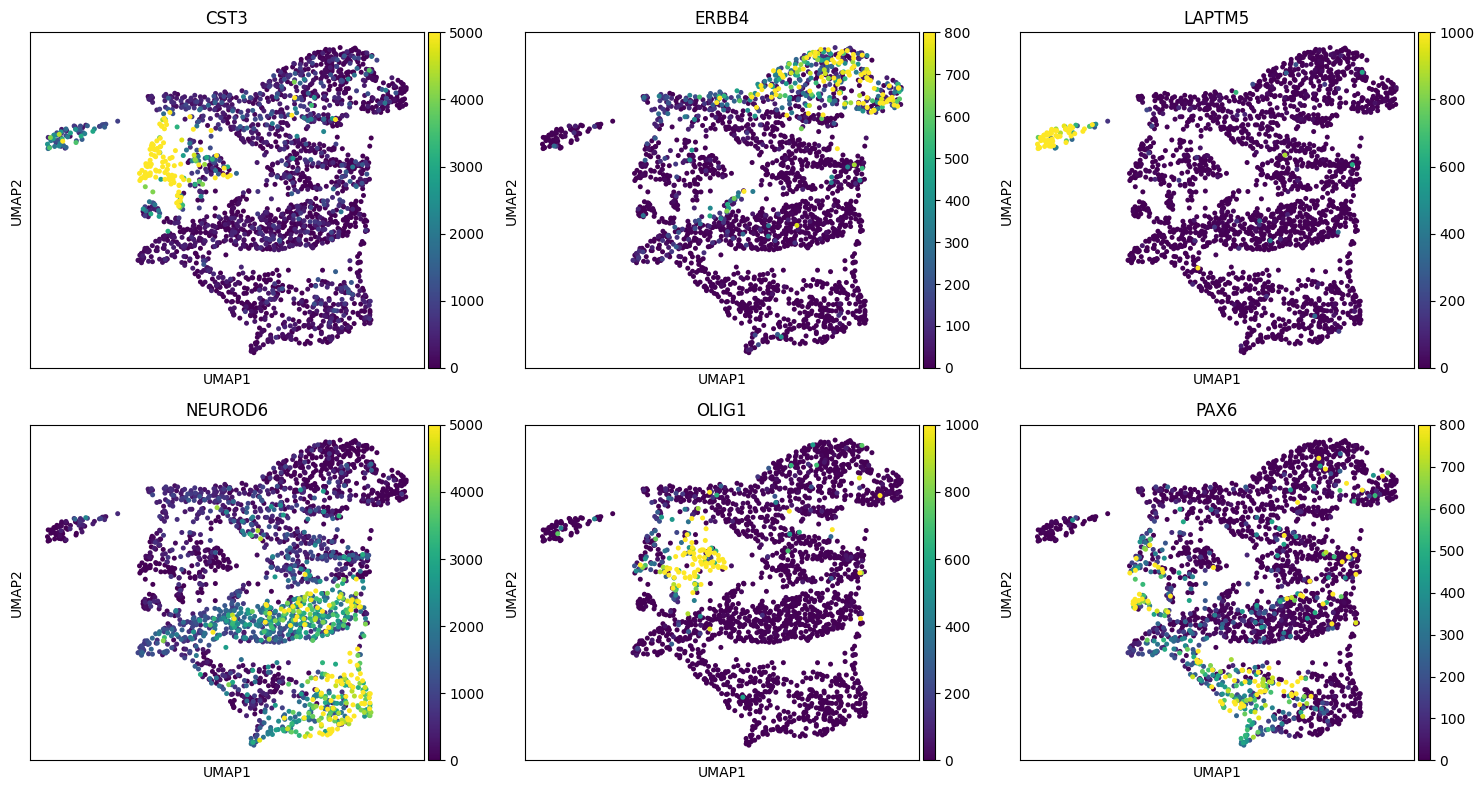

In [37]:
import matplotlib.pyplot as plt
import scanpy as sc

genes = ['CST3', 'ERBB4', 'LAPTM5', 'NEUROD6', 'OLIG1', 'PAX6']
vmax_values = [5000, 800, 1000, 5000, 1000, 800]  # 每张图的 vmax

fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # 调整图形尺寸

for gene, vmax, ax in zip(genes, vmax_values, axes.flatten()):
    sc.pl.umap(
        adata2,
        color=gene,
        vmax=vmax,
        ax=ax, 
        show=False, 
        title=f"{gene}"  # 设置标题
    )

plt.tight_layout()

plt.savefig("./figures/marker_by_cell_type.jpg", dpi=300, bbox_inches="tight")

plt.show()

### tsne

/home/huangxr/anaconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


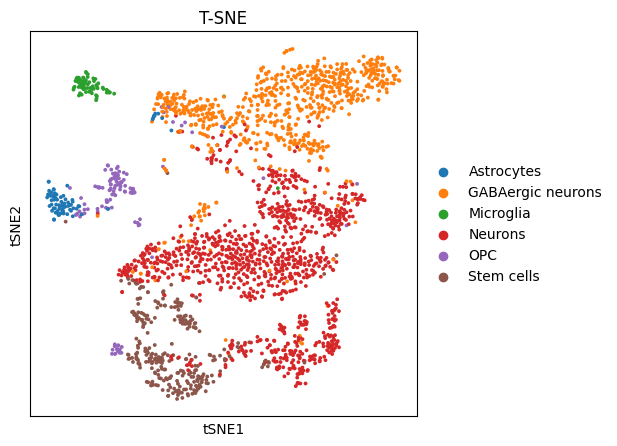

/home/huangxr/anaconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


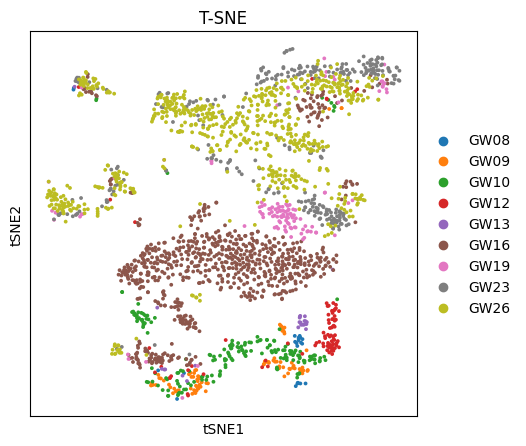

In [38]:
sc.tl.tsne(adata1)
sc.pl.tsne(adata1, color='cell_types', size=30, save='_cell_types')
sc.pl.tsne(adata1, color='week', size=30, save='_cell_types')

### MDS

/home/huangxr/anaconda3/envs/st/lib/python3.8/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


/home/huangxr/anaconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


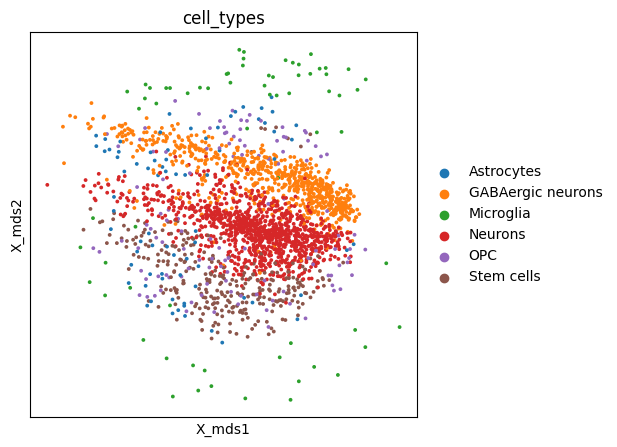

/home/huangxr/anaconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


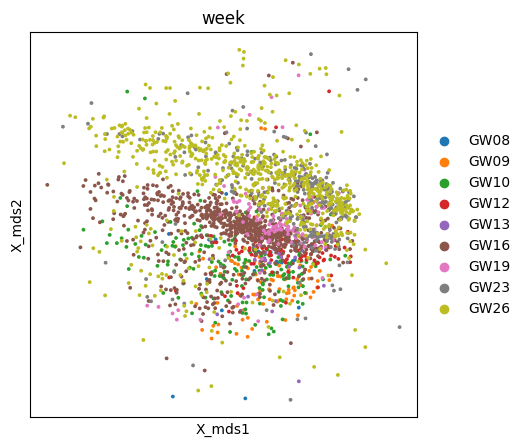

In [17]:
from sklearn.manifold import MDS
X_pca = adata1.obsm['X_pca'][:, :10] 
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_pca)
adata1.obsm['X_mds'] = X_mds
sc.pl.embedding(adata1, basis='X_mds', color='cell_types', size=30, save='_cell_types')
sc.pl.embedding(adata1, basis='X_mds', color='week', size=30, save='_cell_week')

### Isomap

/home/huangxr/anaconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


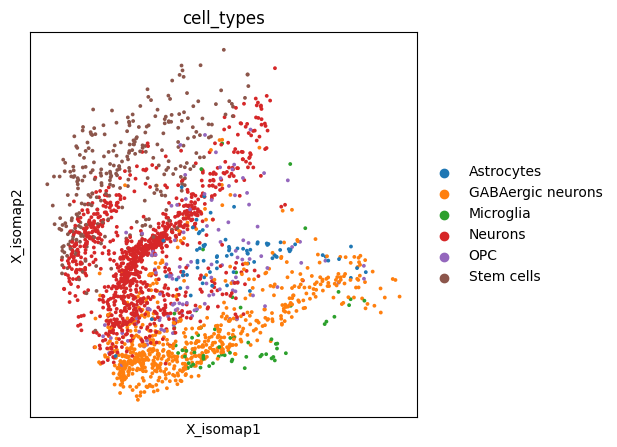

/home/huangxr/anaconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


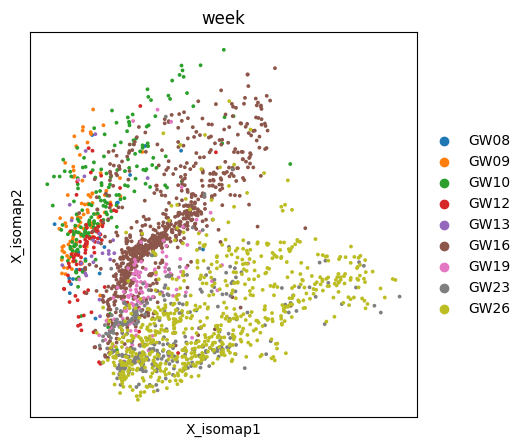

In [19]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2, n_neighbors=10)
X_isomap = isomap.fit_transform(X_pca)

adata1.obsm['X_isomap'] = X_isomap
sc.pl.embedding(adata1, basis='X_isomap', color='cell_types', size=30, save='_cell_types')
sc.pl.embedding(adata1, basis='X_isomap', color='week', size=30, save='_week')

### LLE

/home/huangxr/anaconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


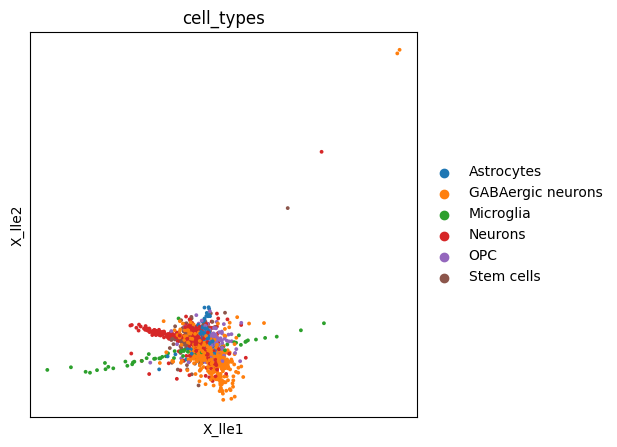

/home/huangxr/anaconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


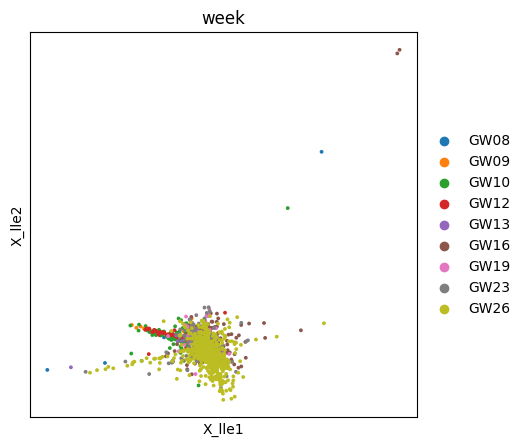

In [20]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_lle = lle.fit_transform(X_pca)

adata1.obsm['X_lle'] = X_lle
sc.pl.embedding(adata1, basis='X_lle', color='cell_types', size=30, save='_cell_types')
sc.pl.embedding(adata1, basis='X_lle', color='week', size=30, save='_week')

## subcell group identification

In [43]:
adata1.obs['subtype'] = 'NA'
for cell_type in adata1.obs['cell_types'].unique():
    adata_subset = adata1[adata1.obs['cell_types'] == cell_type]
    sc.pp.neighbors(adata_subset, n_neighbors=10, n_pcs=30)

    # Louvain
    sc.tl.louvain(adata_subset, resolution=0.6)
    adata_subset.obs['subtype'] = adata_subset.obs['louvain']
    adata1.obs.loc[adata1.obs['cell_types'] == cell_type,'subtype'] = [cell_type + elem for elem in adata_subset.obs['subtype']]

In [44]:
adata1.obs['subtype'] = adata1.obs['subtype'].astype('category')

In [55]:
len(adata1.obs.subtype.unique())

27

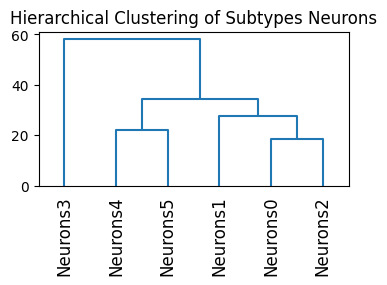

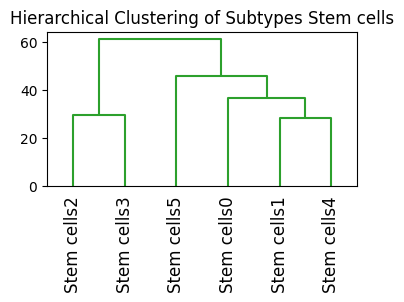

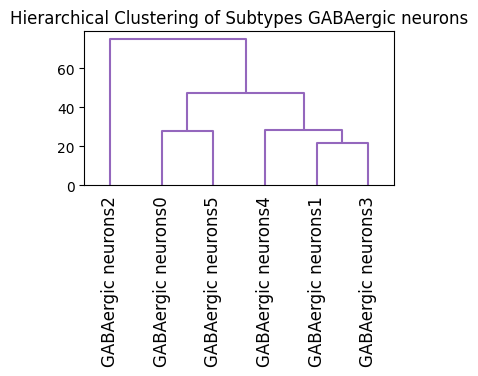

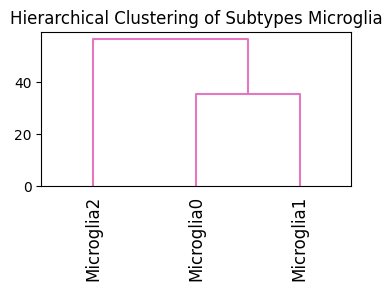

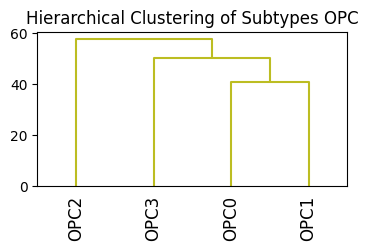

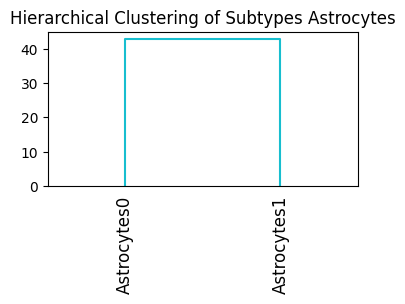

In [97]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import to_hex

linkage_matrix_subtypes = dict()

def get_link_color_func(color):
    def link_color_func(linkage_matrix_row):
        return color 
    return link_color_func

unique_cell_types = adata1.obs['cell_types'].unique()
colors = [to_hex(color) for color in cm.tab10(np.linspace(0, 1, len(unique_cell_types)))]
cell_type_color_map = dict(zip(unique_cell_types, colors))

for cell_type in adata1.obs['cell_types'].unique():
    adata_subset = adata1[adata1.obs['cell_types'] == cell_type]
    subtype_means = adata_subset.to_df().groupby(adata_subset.obs['subtype']).mean()
    linkage_matrix_subtypes[cell_type] = linkage(subtype_means, method='ward')

    color = cell_type_color_map[cell_type]
    link_color_func = get_link_color_func(color)
    
    plt.figure(figsize=(4, 2))
    dendrogram(linkage_matrix_subtypes[cell_type], labels=subtype_means.index, leaf_rotation=90, link_color_func=link_color_func)
    plt.title("Hierarchical Clustering of Subtypes "+cell_type)
    plt.show()

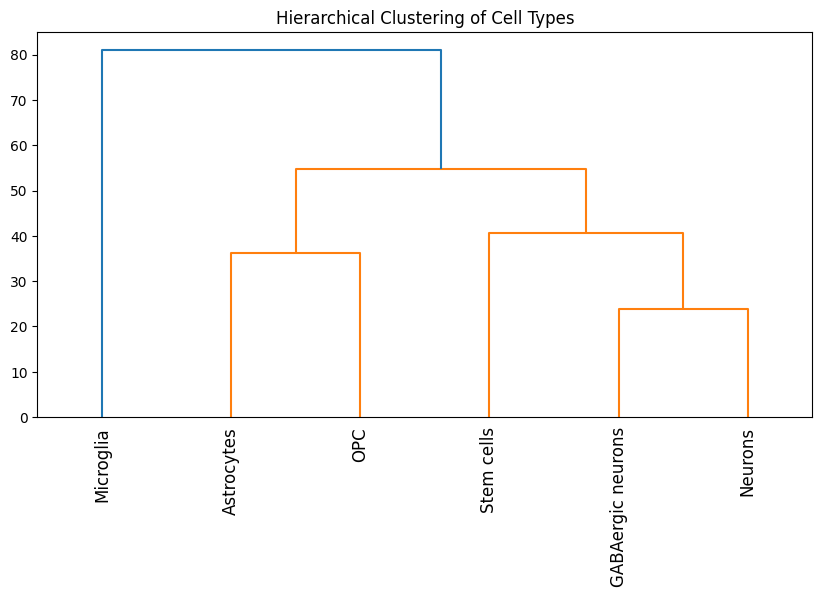

In [98]:
cell_type_means = adata1.to_df().groupby(adata1.obs['cell_types']).mean()

linkage_matrix_cell_types = linkage(cell_type_means, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix_cell_types, labels=cell_type_means.index, leaf_rotation=90)
plt.title("Hierarchical Clustering of Cell Types")
plt.show()

/home/huangxr/anaconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


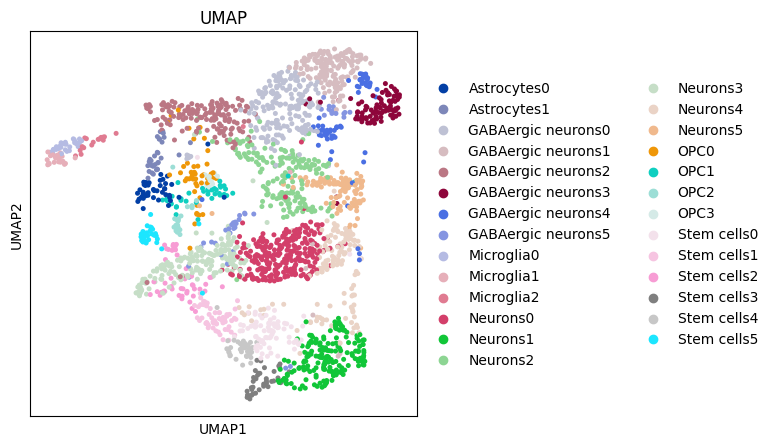

In [47]:
sc.pl.umap(adata1, color='subtype', title='UMAP', save='umap_subtype')

In [50]:
marker_list = dict()
marker_list['Neurons'] = ['NEUROD6', 'EIF1B', 'SLA']
marker_list['Stem cells'] = ['HMGB2', 'HMGN2', 'VIM', 'AURKB']
marker_list['Microglia'] = ['LAPTM5', 'ITM2B','CX3CR1']
marker_list['GABAergic neurons'] = ['MEF2C', 'ADCY1', 'PDE4DIP', 'ERBB4']
marker_list['Astrocytes'] = ['CST3', 'SPARCL1']
marker_list['OPC'] = ['OLIG1', 'PDGFRA', 'SCRG1']
markers = marker_list['Microglia'] + marker_list['Astrocytes'] + marker_list['OPC'] + marker_list['Stem cells'] + marker_list['GABAergic neurons'] + marker_list['Neurons']

In [53]:
from matplotlib import cm
from matplotlib.colors import to_hex

cell_types = adata1.obs['cell_types'].unique()
sub_cell_types = adata1.obs['subtype'].unique()

colors = [to_hex(color) for color in cm.tab10(np.linspace(0, 1, len(cell_types)))]
cell_type_color_map = dict(zip(cell_types, colors))
subtype_color_map = dict(zip(sub_cell_types, [cell_type_color_map[sub[0:(len(sub)-1)]] for sub in sub_cell_types]))


plot_data = []
for gene in markers:
    for subtype in sub_cell_types:
        
        adata_subset = adata1[adata1.obs['subtype'] == subtype]
        expression_values = np.exp(adata_subset[:, gene].X)-1

        plot_data.append(pd.DataFrame({
            "Gene": [gene] * len(expression_values),
            "Cell Type": [subtype] * len(expression_values),
            "Expression": expression_values.reshape(-1)
        }))

plot_data = pd.concat(plot_data, ignore_index=True)

/tmp/ipykernel_1051202/2276771365.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


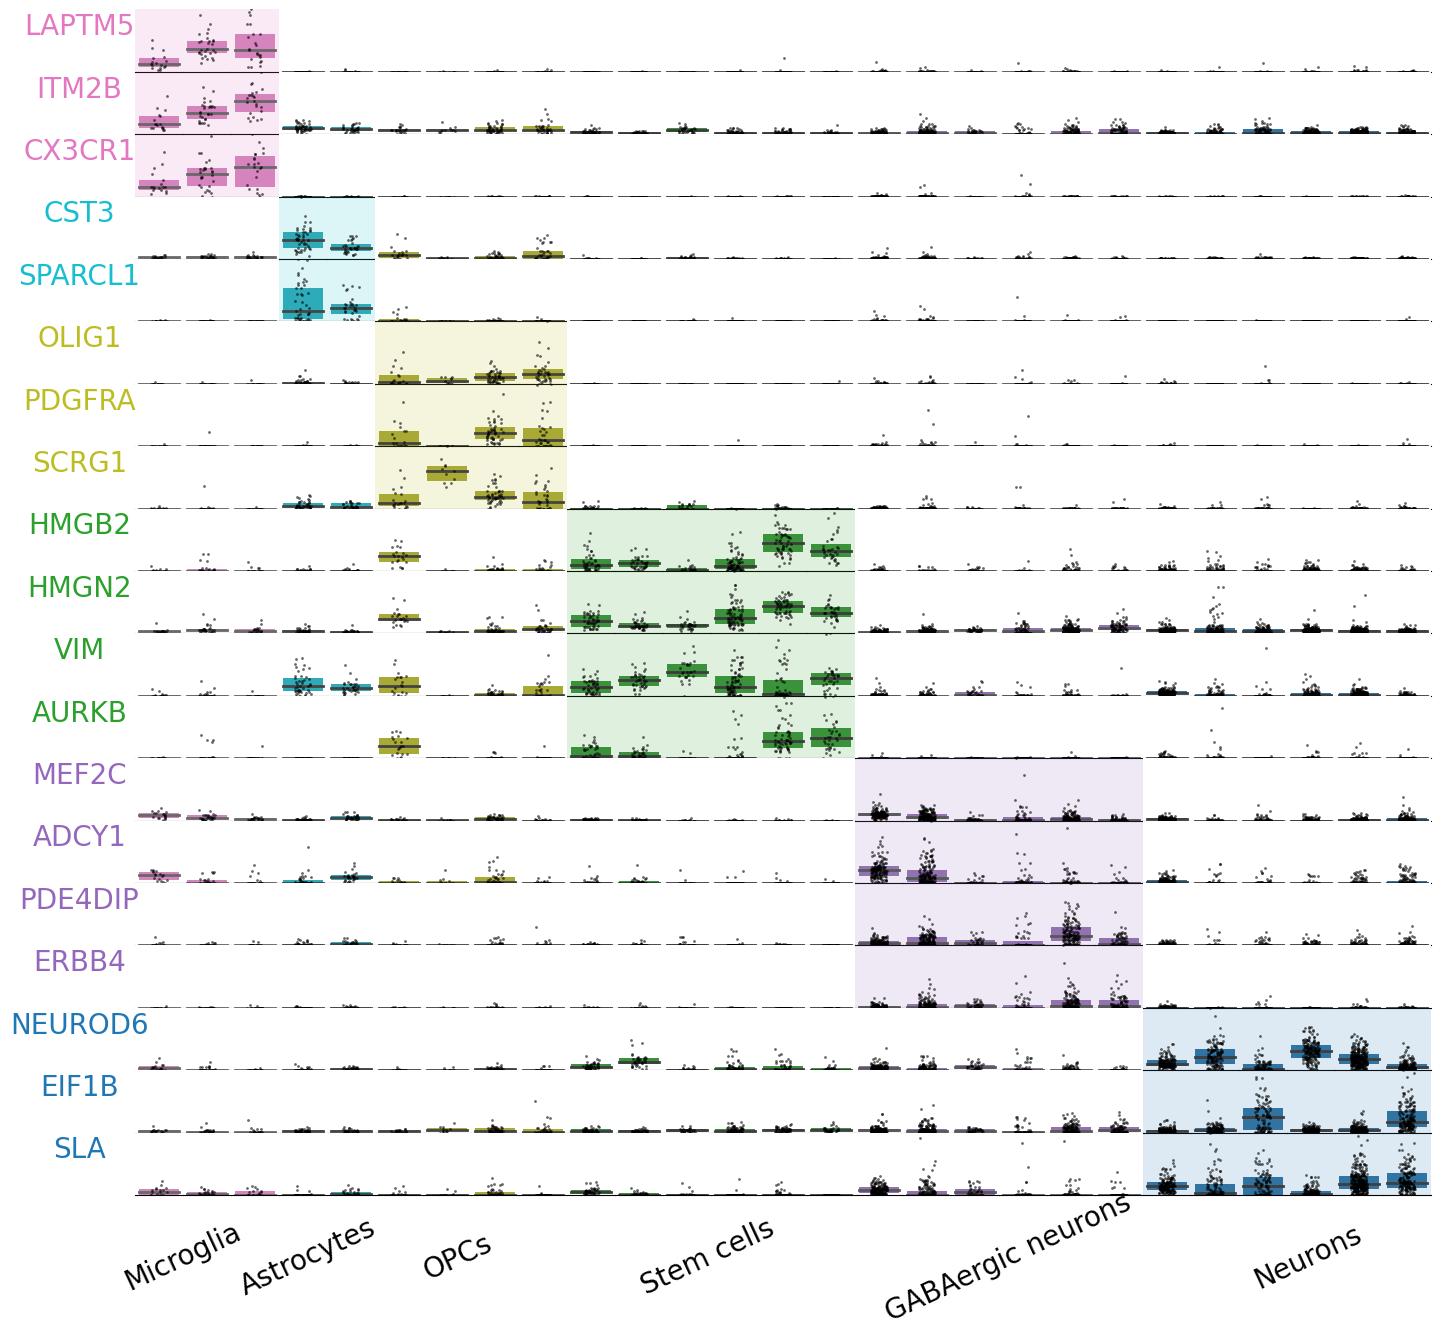

In [251]:
from matplotlib.gridspec import GridSpec
import seaborn as sns
import matplotlib.colors as mcolors

sub_cell_types_by_order = ['Microglia2', 'Microglia0', 'Microglia1',\
                           'Astrocytes0', 'Astrocytes1',\
                           'OPC2', 'OPC3', 'OPC0', 'OPC1',\
                           'Stem cells2', 'Stem cells3', 'Stem cells5', 'Stem cells0', 'Stem cells1', 'Stem cells4',\
                           'GABAergic neurons2', 'GABAergic neurons0', 'GABAergic neurons5', 'GABAergic neurons4', 'GABAergic neurons1', 'GABAergic neurons3',\
                           'Neurons3', 'Neurons4', 'Neurons5', 'Neurons1', 'Neurons0', 'Neurons2'           
                           ]

major_type_mapping = {
    "Microglia": ["Microglia2", "Microglia0", "Microglia1"],
    "Astrocytes": ["Astrocytes0", "Astrocytes1"],
    "OPCs": ["OPC2", "OPC3", "OPC0", "OPC1"],
    "Stem cells": ["Stem cells2", "Stem cells3", "Stem cells5", "Stem cells0", "Stem cells1", "Stem cells4"],
    "GABAergic neurons": ["GABAergic neurons2", "GABAergic neurons0", "GABAergic neurons5", "GABAergic neurons4", "GABAergic neurons1", "GABAergic neurons3"],
    "Neurons": ["Neurons3", "Neurons4", "Neurons5", "Neurons1", "Neurons0", "Neurons2"]
}

major_type_positions = {}
for major_type, subtypes in major_type_mapping.items():
    start = sub_cell_types_by_order.index(subtypes[0])
    end = sub_cell_types_by_order.index(subtypes[-1])
    major_type_positions[major_type] = (start, end)


n_genes = len(markers)
n_cell_types = len(sub_cell_types)
fig = plt.figure(figsize=(n_cell_types * 0.5, n_genes * 0.65))
gs = GridSpec(n_genes, n_cell_types, figure=fig, wspace=0, hspace=0, left=0.02, right=0.98, top=0.98, bottom=0.02)

for i, gene in enumerate(markers):
    
    y_min = plot_data.loc[(plot_data["Gene"] == gene), "Expression"].min()
    y_max = plot_data.loc[(plot_data["Gene"] == gene), "Expression"].max()

    for j, cell_type in enumerate(sub_cell_types_by_order):

        data = plot_data[(plot_data["Gene"] == gene) & (plot_data["Cell Type"] == cell_type)]
        
        ax = fig.add_subplot(gs[i, j])
        sns.boxplot(
            x="Cell Type", y="Expression", data=data, 
            color=subtype_color_map[cell_type], ax=ax, showfliers=False, linewidth=2,
            width=0.5,
            boxprops=dict(edgecolor="none"), 
            whiskerprops=dict(color="none"), 
            capprops=dict(color="none")
        )

        if gene in marker_list[cell_type[0:(len(cell_type)-1)]]:
            color = subtype_color_map[cell_type]  
            rgba_color = mcolors.to_rgba(color, alpha=0.15)
            ax.set_facecolor(rgba_color)
            
        sns.stripplot(
            x="Cell Type", y="Expression", data=data, 
            color="black", ax=ax, size=2, jitter=True, alpha=0.6, linewidth=0
        )

        #ax.axis('off')
        ax.margins(x=0.1, y=0.1)
        
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines['top'].set_visible(False)    
        ax.spines['right'].set_visible(False)  
        ax.spines['left'].set_visible(False)   
        #ax.spines['bottom'].set_visible(False)
        
        ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

        #if i == 0:
        #ax.set_title(cell_type, fontsize=20)
        if j == 0:
            color_text = subtype_color_map[[list(marker_list.items())[i][0] for i in range(len(marker_list)) if gene in list(marker_list.items())[i][1]][0]+'0']
            ax.set_ylabel(gene, fontsize=20, rotation=0, labelpad=40, color=color_text)

        ax.set_ylim(y_min, y_max) 

for major_type, (start, end) in major_type_positions.items():
    center = (start + end + 1) / 2 / n_cell_types
    fig.text(center, -0.03, major_type, ha="center", va="center", fontsize=20, rotation=25, color="black")
    
plt.tight_layout()

plt.savefig("./subtype_exp.jpg", dpi=150, bbox_inches="tight")

plt.show()